In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Option 1. ELTeC-DEU corpus

### Einlesen der Korpusmetadaten in Python

In [79]:
meta = pd.read_csv("https://zenodo.org/records/4662482/files/metadata.csv")
meta.head()

,id,author-name,book-title,subgenre,year,year-cat,canon-cat,gender-cat,length,length-cat,counter,Author-birth,Author-death,GND
0,DEU001,"Willkomm, Ernst Adolf",Weisse Sclaven oder die Leiden des Volkes,foo,1845,T1,low,m,322371,long,1,1810,1886,http://d-nb.info/gnd/11739467X
1,DEU002,"Auerbach, Berthold",Der Lehnhold,foo,1854,T1,low,m,66067,medium,1,1812,1882,http://d-nb.info/gnd/11865103X
2,DEU003,"Ruppius, Otto",Der Pedlar,foo,1857,T1,low,m,89800,medium,1,1819,1864,http://d-nb.info/gnd/116708859
3,DEU004,"Otto, Louise",Nürnberg. Zweiter Band,foo,1858,T1,low,f,56702,medium,1,1819,1895,http://d-nb.info/gnd/118590901
4,DEU005,"Kurz, Hermann",Der Sonnenwirt,foo,1854,T1,high,m,216063,long,1,1813,1873,http://d-nb.info/gnd/118778277


### Analyse der zeitlichen Verteilung des Korpus

Pro Jahr

In [80]:
# Anzahl der Texte pro Jahr

def summarize_texts_per_year(df, year_column):
    """Return per-yearcounts and summary stats for the given year column."""
    bins = df[year_column].dropna()
    if bins.empty:
        raise ValueError(f"No year values found in column '{year_column}'.")
    bins = bins.astype(int)
    counts = bins.value_counts().sort_index()
    full_index = pd.RangeIndex(counts.index.min(), counts.index.max() + 1)
    counts = counts.reindex(full_index, fill_value=0)
    stats = counts.agg(['mean', 'max', 'min']).rename({'mean': 'avg_per_year'})
    return counts, stats

year_counts, year_stats = summarize_texts_per_year(meta, 'year')

print("Textanzahl der Texte im ELTEC-DEU pro Jahr:")
print(year_stats)



Textanzahl der Texte im ELTEC-DEU pro Jahr:
avg_per_year    1.234568
max             5.000000
min             0.000000
Name: count, dtype: float64


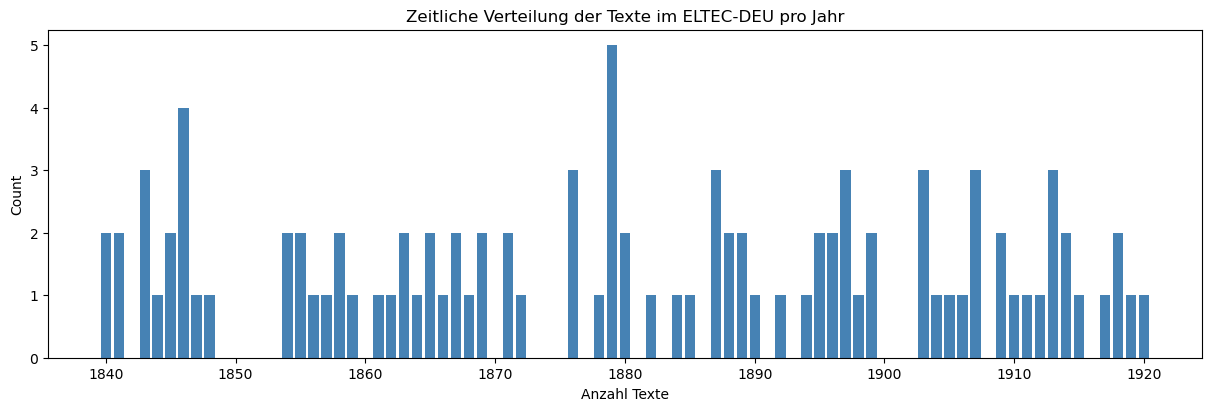

In [81]:
# Visualisierung der Jahresverteilung (Textanzahl pro Jahr)
fig_year, ax_year = plt.subplots(figsize=(12, 4), constrained_layout=True)
ax_year.bar(year_counts.index, year_counts.values, color="steelblue")
ax_year.set_title("Zeitliche Verteilung der Texte im ELTEC-DEU pro Jahr")
ax_year.set_xlabel("Anzahl Texte")
ax_year.set_ylabel("Count")
plt.show()

Pro Jahrzehnt

In [87]:
# Anzahl der Texte pro Jahrzehnt
def summarize_texts_per_decade(df, decade_column):
    """Return per-yearcounts and summary stats for the given year column."""
    bins = df[decade_column].dropna()
    if bins.empty:
        raise ValueError(f"No year values found in column '{decade_column}'.")
    bins = bins.astype(int)
    counts = bins.value_counts().sort_index()
    stats = counts.agg(['mean', 'max', 'min']).rename({'mean': 'avg_per_year'})
    return counts, stats

meta['decade'] = (meta['year'] // 10) * 10
decade_counts, decade_stats = summarize_texts_per_decade(meta, 'decade')

print("Textanzahl der Texte im ELTEC-DEU pro Jahrzehnt:")
print(decade_stats)

Textanzahl der Texte im ELTEC-DEU pro Jahrzehnt:
avg_per_year    11.111111
max             16.000000
min              1.000000
Name: count, dtype: float64


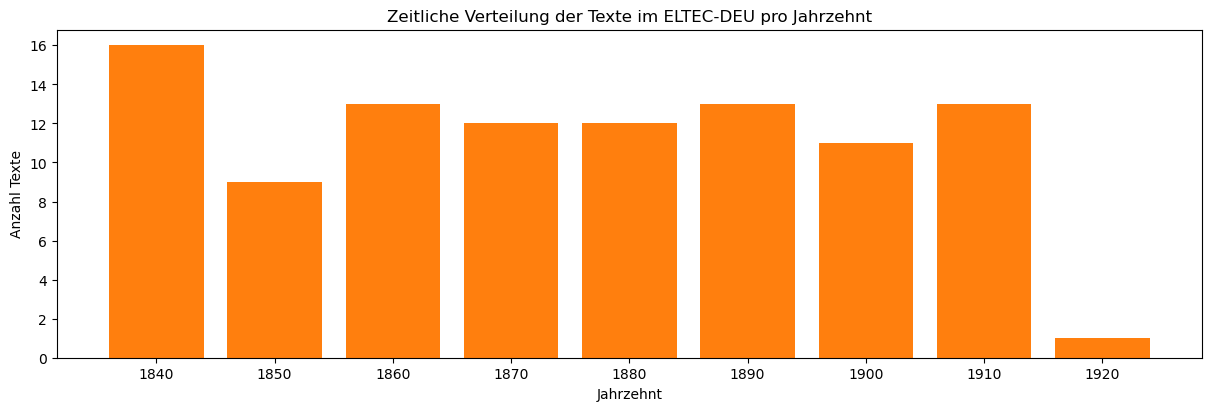

In [88]:
# Visualisierung der Dekadenverteilung (Textanzahl pro Dekade)
fig_decade, ax_decade = plt.subplots(figsize=(12, 4), constrained_layout=True)
ax_decade.bar(decade_counts.index.astype(str), decade_counts.values, color="tab:orange")
ax_decade.set_title("Zeitliche Verteilung der Texte im ELTEC-DEU pro Jahrzehnt")
ax_decade.set_xlabel("Jahrzehnt")
ax_decade.set_ylabel("Anzahl Texte")
plt.show()


# Option 2. d-Prose corpus

### Einlesen der Korpusmetadaten in Python

In [89]:
## code to analyse the metadata of the d-Prose corpus

meta_d_prose = pd.read_csv("https://zenodo.org/records/5015008/files/d-prose_V2_norm_year.csv", 
                           sep=';')
meta_d_prose.head()

,ID,Repositorium,Vorname Autor,Nachname Autor,Nationalität,Pseudonym/Anderer Name,Gesamtname Autor,Geburtsjahr,Sterbejahr,Autor:innengender,Titel,Dateiname,verwendetes Datum,Wörter,Typen,norm_year
0,1,gutenberg,Arthur,Achleitner,Deutschland,NaN,Arthur Achleitner,1858.0,1927,male,Das Schloß im Moor,Achleitner_Arthur_Das_Schloss_im_Moor,1903,50886,9654,1903
1,2,gutenberg,Arthur,Achleitner,Deutschland,NaN,Arthur Achleitner,1858.0,1927,male,Der Finanzer,Achleitner_Arthur_Der_Finanzer,1903,23933,5941,1903
2,3,gutenberg,Karl,Adolph,Österreich,NaN,Karl Adolph,1869.0,1931,male,Haus Nummer 37,Adolph_Karl_Haus_Nummer,1908,102735,17038,1908
3,4,gutenberg,Karl,Adolph,Österreich,NaN,Karl Adolph,1869.0,1931,male,Schackerl,Adolph_Karl_Schackerl,1912,39838,9266,1912
4,5,gutenberg,Karl,Adolph,Österreich,NaN,Karl Adolph,1869.0,1931,male,Töchter,Adolph_Karl_Toechter,1914,87720,15569,1914


### Analyse der zeitlichen Verteilung des Korpus

Pro Jahr (d-Prose)

In [90]:
year_counts, year_stats = summarize_texts_per_year(meta_d_prose, 'norm_year')

print("Textanzahl der Texte im d-Prose pro Jahr:")
print(year_stats)

Textanzahl der Texte im d-Prose pro Jahr:
avg_per_year     49.235294
max             136.000000
min               6.000000
Name: count, dtype: float64


Man sieht, dass d-Prose ein wesentlich "dichteres" Korpus ist …

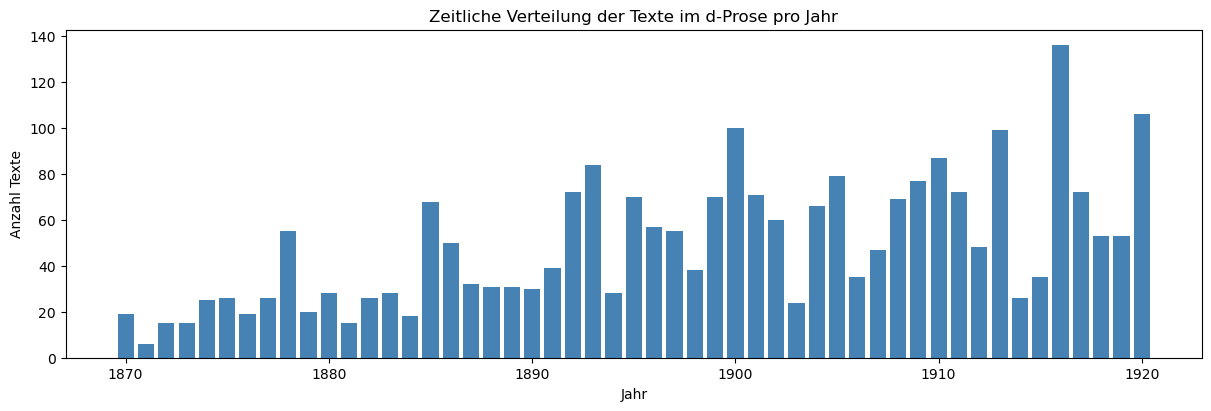

In [91]:
# Visualisierung der Jahresverteilung (Textanzahl pro Jahr)
fig_year, ax_year = plt.subplots(figsize=(12, 4), constrained_layout=True)
ax_year.bar(year_counts.index, year_counts.values, color="steelblue")
ax_year.set_title("Zeitliche Verteilung der Texte im d-Prose pro Jahr")
ax_year.set_xlabel("Jahr")
ax_year.set_ylabel("Anzahl Texte")
plt.show()

In [92]:
# Anzahl der Texte pro Jahrzehnt
def summarize_texts_per_decade(df, decade_column):
    """Return per-yearcounts and summary stats for the given year column."""
    bins = df[decade_column].dropna()
    if bins.empty:
        raise ValueError(f"No year values found in column '{decade_column}'.")
    bins = bins.astype(int)
    counts = bins.value_counts().sort_index()
    stats = counts.agg(['mean', 'max', 'min']).rename({'mean': 'avg_per_year'})
    return counts, stats

meta_d_prose['decade'] = (meta_d_prose['norm_year'] // 10) * 10

decade_counts, decade_stats = summarize_texts_per_decade(meta_d_prose, 'decade')

print("Textanzahl der Texte im ELTEC-DEU pro Jahrzehnt:")
print(decade_stats)

Textanzahl der Texte im ELTEC-DEU pro Jahrzehnt:
avg_per_year    418.5
max             681.0
min             106.0
Name: count, dtype: float64


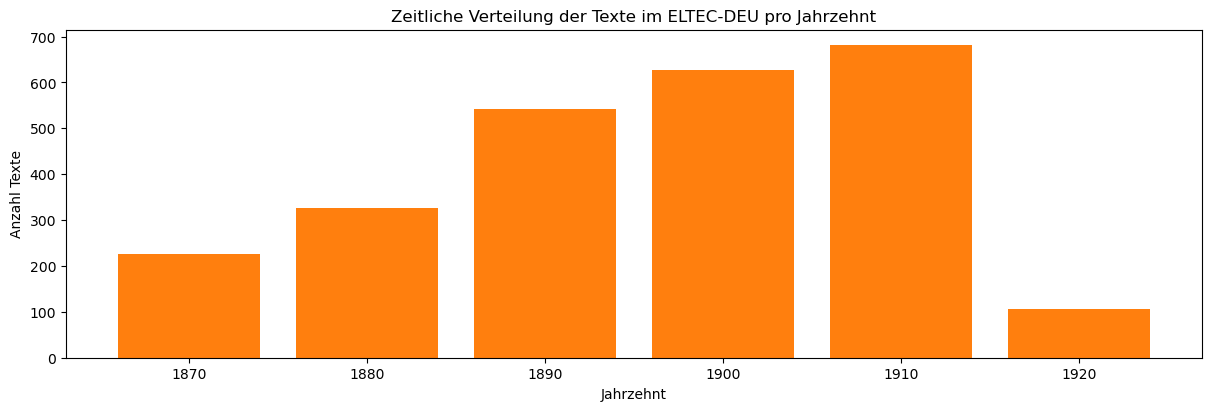

In [93]:
# Visualisierung der Dekadenverteilung (Textanzahl pro Dekade)
fig_decade, ax_decade = plt.subplots(figsize=(12, 4), constrained_layout=True)
ax_decade.bar(decade_counts.index.astype(str), decade_counts.values, color="tab:orange")
ax_decade.set_title("Zeitliche Verteilung der Texte im ELTEC-DEU pro Jahrzehnt")
ax_decade.set_xlabel("Jahrzehnt")
ax_decade.set_ylabel("Anzahl Texte")
plt.show()


# German Fiction Corpus